# Inaugural Project

Imports and set magics:

In [2]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
#import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In this question we solve for optimal hours spent for work,Illistration of $\frac{H_M}{H_M}$ for $\alpha \in \{ 0.25, 0.50, 0.75\}$ and $\sigma \in \{ 0.5, 1.0, 1.5\}$ 

**Calculating the optimal relative hours** 

In [3]:
#Model
model_1 = HouseholdSpecializationModelClass()
par = model_1.par
sol = model_1.sol

#List of paramters to solve for 
list_alpha = [0.25, 0.5, 0.75]
list_sigma = [0.5, 1.0, 1.5]

# empty list to store the relative wage values
table_data = []

# loop alpha values
for alpha in list_alpha:
    # row list for the current alpha value
    row_data = []
    
    # loop  sigma values
    for sigma in list_sigma:
        # parameter values
        par.alpha = alpha
        par.sigma = sigma
        
        # solve for optimal solution
        opt = model_1.solve_discrete()
        
        # calculate relative wage and append to row list
        relative_wage = opt.HF / opt.HM
        row_data.append(relative_wage)
    
    # append the row list to the table data list
    table_data.append(row_data)

# create a pandas DataFrame from the table data
table = pd.DataFrame(table_data, index=list_alpha, columns=list_sigma)

# print the table
print(f' Relativ hours worked given (alpha,sigma)')
print(  table)


 Relativ hours worked given (alpha,sigma)
           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50  1.000000  1.000000  1.000000
0.75  1.833333  3.250000  4.666667


**Ilistrations of the optimal relative hours** 

The effects of varrying $\alpha , \sigma$ can be seen in the folowing illistration. The illistration show that increase in $\alpha$ or $\sigma$ increase the hours worked at home by the female familiy member , relative to the male family member. 
This is in line with expectations from the model, as the parameters increase the productivity/importance of female hourse worked at home.

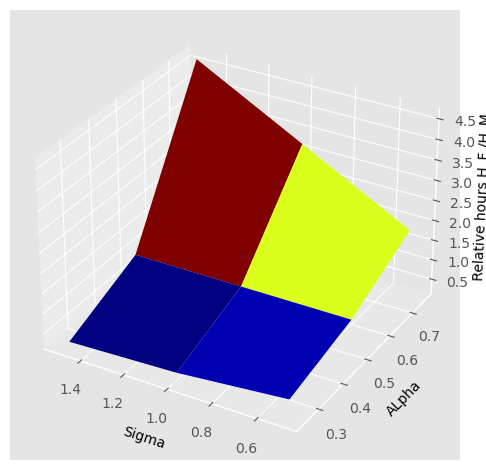

In [4]:
#Illistration 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create x, y and z values
x_data, y_data = np.meshgrid(table.columns, table.index)
z_data = table.values

# plot the surface
ax.plot_surface(x_data, y_data, z_data, cmap=cm.jet)

# set the axis labels
ax.set_xlabel('Sigma')
ax.set_ylabel('ALpha')
ax.set_zlabel('Relative hours H_F /H_M', labelpad=0)
# c. invert xaxis to bring Origin in center front
ax.invert_xaxis()
fig.tight_layout()
plt.show()

# Question 2

**Ploting relative wage**

In this question we examin the relation between the relative hours worked at home, with the relative wage (log) for the discrete model.



In [5]:
model_2 = HouseholdSpecializationModelClass()
#Unpaking model parameters
par = model_2.par


results_q2 = []

#Code solves the discrete model for different relativ wages
for i in par.wF_vec:
    par.wF = i
    opt = model_2.solve_discrete()
        
    relative_hours = opt.HF/opt.HM
    log_relative_h = np.log(relative_hours)
    results_q2 = np.append(results_q2, log_relative_h)
    #print(f'For a relative wage ratio of {i:2f} the optimal relative hours at home are (HF/HM) {relative_hours:3f}')


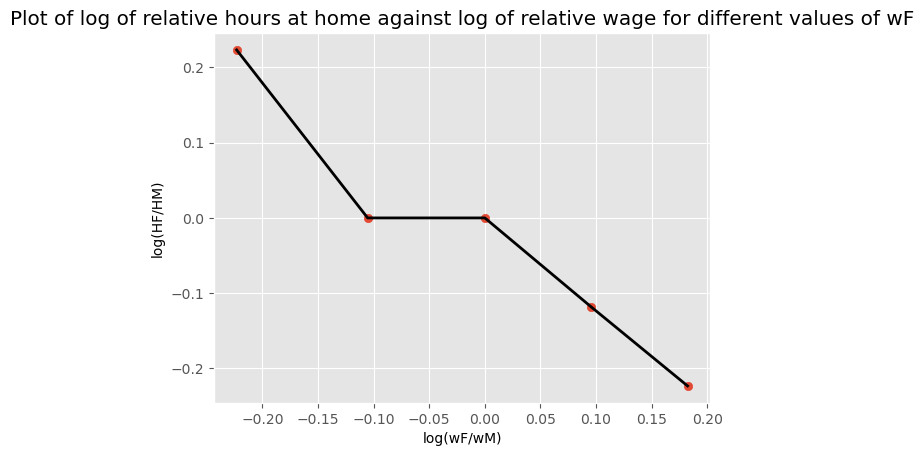

In [6]:
# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(par.wF_vec), results_q2, color='black', lw=2)
ax.scatter(np.log(par.wF_vec), results_q2)
# alterations to figure
ax.grid(True)
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()


The illistration shows that as the wage given to females rise, the optimal hours spent working at home fallse. The kink in the figure is due to the model being discrete. 

# Question 3

**Ploting relative wage**

In this question we examin the relation between the relative hours worked at home, with the relative wage (log) in a discrete model, where the choice of hours worked may be continus.



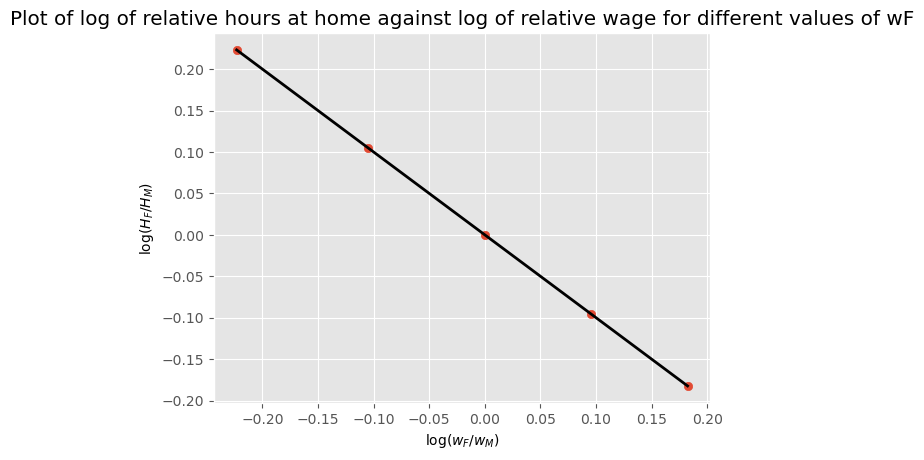

In [7]:
# create figure
model_3 = HouseholdSpecializationModelClass()
par = model_3.par

relative_hours = np.log(model_3.solve_wF_vec() )
relative_wage = np.log(par.wF_vec / par.wM)


fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, relative_hours, color='black', lw=2)
ax.scatter(relative_wage, relative_hours)
# alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log of relative wage for different values of wF")
plt.show()




The figure follows the same intuition as in question 3. If females wage increase, they work more in teh work force, and therefore have less time to work at home. In this case there is no kink

# Question 4 #

For the model to fit the regression estimates, the parameters must be alpha = 0.98 and sigma = 0.10. That is, females are fare more productive in working at home. This can be seen based on the following optimisation 

In [8]:

model_4 =HouseholdSpecializationModelClass()

par = model_4.par
sol = model_4.sol

def obj(q):
    par.alpha, par.sigma = q

    model_4.solve_wF_vec_2()
    model_4.run_regression()

    err =  (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2
    return err
    #return (par.beta0_target - sol.beta0)**2 + (par.beta1_target-sol.beta1)**2

bounds = [(0, 1),(0.01, 2)]
#bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = (0.5, 1)
#initial_guess = [0.8, 0.1]


reg_opt = optimize.minimize(obj, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige


alpha_hat = reg_opt.x[0]
sigma_hat = reg_opt.x[1]

err = obj(reg_opt.x)



print (f'Minimizing the squared errrors gives the regressio:')
print(f"    Beta0_hat =  {sol.beta0:.2f}")
print(f"    Beta1_hat =  {sol.beta1:.2f}")

print(f'This gives the parameters: \n    alpha = {alpha_hat:.2f} \n    sigma = {sigma_hat:.2f}')
print(f' With the squared error {err:.2f}')


/Users/emmagundersen/Documents/Programing/projects-2023-mathias-og-emma-til-aflevering /inauguralproject/HouseholdSpecializationModel.py:213: RuntimeWarning: divide by zero encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)


Minimizing the squared errrors gives the regressio:
    Beta0_hat =  0.40
    Beta1_hat =  -0.10
This gives the parameters: 
    alpha = 0.98 
    sigma = 0.10
 With the squared error 0.00
